In [44]:
# build surface
from ase.build import fcc100, add_adsorbate
from ase.visualize import view
slab = fcc100("Al", size=(2,2,3))
add_adsorbate(slab, "Au", height=1.7, position="hollow")
slab.center(vacuum=10.0, axis=2) # 加上周期性边界
view(slab)

In [45]:
# fix the second and third layers
from ase.constraints import FixAtoms
mask = [atom.tag>1 for atom in slab]
print(mask)
slab.set_constraint(FixAtoms(mask=mask))

[True, True, True, True, True, True, True, True, False, False, False, False, False]


In [46]:
# calc
from ase.calculators.emt import EMT
from ase.optimize import QuasiNewton
slab.calc = EMT()

# initial state
qn = QuasiNewton(slab, trajectory="initial.traj")
qn.run(fmax=0.05)

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 23:57:59        3.323870*       0.2462
BFGSLineSearch:    1[  1] 23:57:59        3.314754*       0.0378


True

In [47]:
# Final state
slab[-1].x += slab.get_cell()[0,0] / 2
# view(slab)
qn = QuasiNewton(slab, trajectory="final.traj")
qn.run(fmax=0.05)

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 23:57:59        3.320051*       0.1208
BFGSLineSearch:    1[  1] 23:57:59        3.316117*       0.0474


True

In [60]:
# NEB
from ase.io import read
from ase.neb import NEB
from ase.optimize import BFGS
initial = read('initial.traj')
final = read('final.traj')

constraint = FixAtoms(mask=[atom.tag>1 for atom in initial])
images = [initial]
for i in range(3):
    img = initial.copy()
    # view(img)
    img.calc =EMT()
    img.set_constraint(constraint)
    images.append(img)

images.append(final)
neb =NEB(images)
neb.interpolate()

qn = BFGS(neb, trajectory="neb.traj")
qn.run(fmax=0.05)

      Step     Time          Energy         fmax
BFGS:    0 00:07:43        4.219952        3.5208
BFGS:    1 00:07:43        3.937039        2.1765
BFGS:    2 00:07:43        3.719814        0.4351
BFGS:    3 00:07:43        3.709652        0.2301
BFGS:    4 00:07:43        3.708879        0.2441
BFGS:    5 00:07:43        3.706088        0.2577
BFGS:    6 00:07:43        3.698532        0.2134
BFGS:    7 00:07:43        3.692121        0.2462
BFGS:    8 00:07:43        3.692274        0.1873
BFGS:    9 00:07:43        3.693484        0.1727
BFGS:   10 00:07:43        3.692659        0.1514
BFGS:   11 00:07:43        3.690809        0.0736
BFGS:   12 00:07:43        3.690202        0.0708
BFGS:   13 00:07:44        3.690382        0.0782
BFGS:   14 00:07:44        3.690426        0.1034
BFGS:   15 00:07:44        3.689890        0.0998
BFGS:   16 00:07:44        3.689029        0.0543
BFGS:   17 00:07:44        3.688737        0.0289


True

In [66]:
# ase.neb.NEBTools
import matplotlib.pyplot as plt
from ase.neb import NEBTools

imgs = read("neb.traj@-5:")
nebtools = NEBTools(imgs)
# Get the calculated barrier and the energy change of the reaction.
nebtools.get_barrier()

(0.3739823279984211, 0.0013629171165163712)

In [67]:
# Get the barrier without any interpolation between highest images.
nebtools.get_barrier(fit=False)

(0.3739823279984211, 0.0013629171165163712)

In [69]:
# Get the actual maximum force at this point in the simulation.
nebtools.get_fmax()

0.02891567439389696

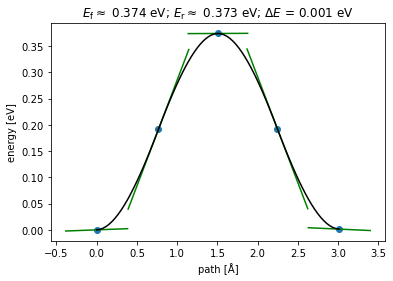

In [70]:
# Create a figure like that coming from ASE-GUI.
fig = nebtools.plot_band()
fig.savefig('diffusion-barrier.png')

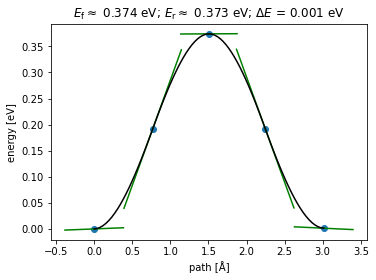

In [71]:
# Create a figure with custom parameters.
fig = plt.figure(figsize=(5.5, 4.0))
ax = fig.add_axes((0.15, 0.15, 0.8, 0.75))
nebtools.plot_band(ax)
fig.savefig('diffusion-barrier.png')